<a href="https://colab.research.google.com/github/Pooja2061/Portfolio/blob/main/2505809_(PoojaBhandari).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 Problem - 1: Getting Started with Data Exploration
1. Data Exploration and Understanding:

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724              

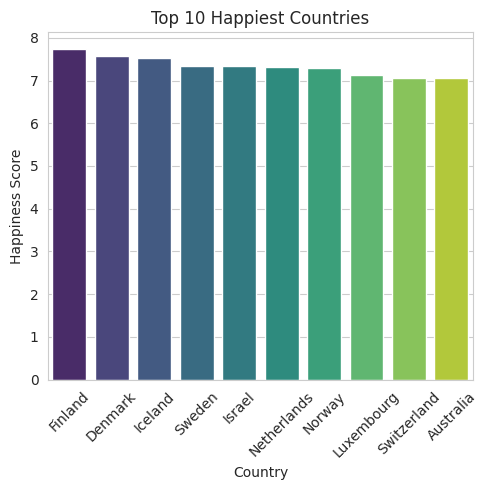

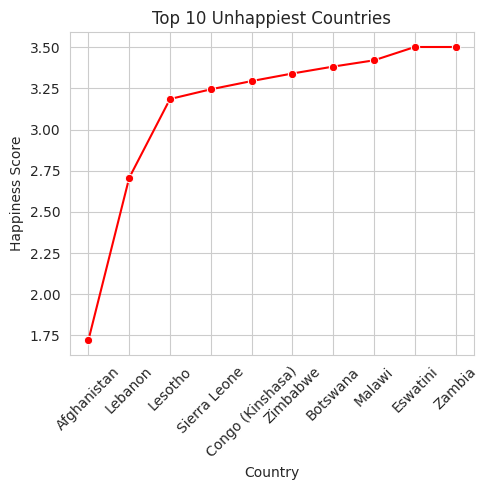

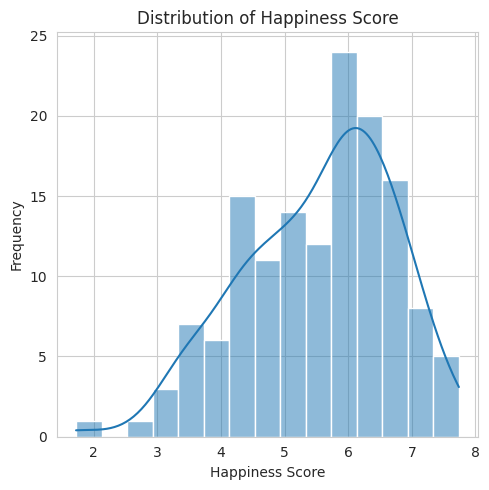

Histogram Interpretation: Most countries have a happiness score between 5 and 7, indicating a moderately high global happiness with a slight positive skew.


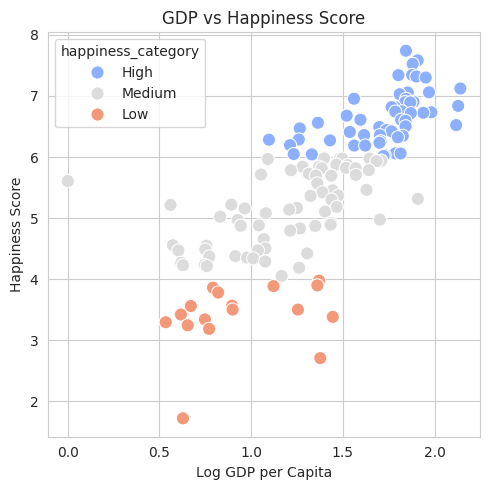

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/AI/Coursework1/WHR-2024-5CS037.csv")

print(df.head(10))
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)
print("Mean Score:", df["score"].mean())
print("Median Score:", df["score"].median())
print("Std Dev Score:", df["score"].std())
print("Highest Score Country:", df.loc[df["score"].idxmax(), "Country name"])
print("Lowest Score Country:", df.loc[df["score"].idxmin(), "Country name"])
print("Missing Values:\n", df.isnull().sum())

filtered_df = df[df["score"] > 7.5]
print(filtered_df)
top10_gdp = filtered_df.sort_values("Log GDP per capita", ascending=False).head(10)
print(top10_gdp)

df["happiness_category"] = df["score"].apply(lambda x: "Low" if x < 4 else ("Medium" if x <= 6 else "High"))

sns.set_style("whitegrid")

top10 = df.sort_values("score", ascending=False).head(10)
plt.figure(figsize=(5,5))
sns.barplot(data=top10, x="Country name", y="score", hue="Country name", palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Happiest Countries")
plt.tight_layout()
plt.show()

bottom10 = df.sort_values("score").head(10)
plt.figure(figsize=(5,5))
sns.lineplot(data=bottom10, x="Country name", y="score", marker="o", color="red")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title("Top 10 Unhappiest Countries")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.histplot(df["score"], bins=15, kde=True)
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Happiness Score")
plt.tight_layout()
plt.show()
print("Histogram Interpretation: Most countries have a happiness score between 5 and 7, indicating a moderately high global happiness with a slight positive skew.")

plt.figure(figsize=(5,5))
sns.scatterplot(data=df, x="Log GDP per capita", y="score", hue="happiness_category", palette="coolwarm", s=90)
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("GDP vs Happiness Score")
plt.tight_layout()
plt.show()

3.2 Problem - 2 - Some Advance Data Exploration Task:

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

south_asia = ["Afghanistan","Bangladesh","Bhutan","India",
              "Maldives","Nepal","Pakistan","Sri Lanka"]

south_df = df[df["Country name"].isin(south_asia)].copy()

south_df.to_csv("/content/drive/MyDrive/AI/Coursework1/WHR-2024-5CS037.csv", index=False)

south_df


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,happiness_category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


Task - 2 - Composite Score Ranking

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


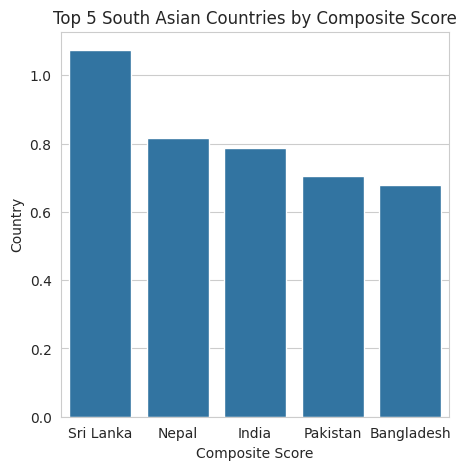

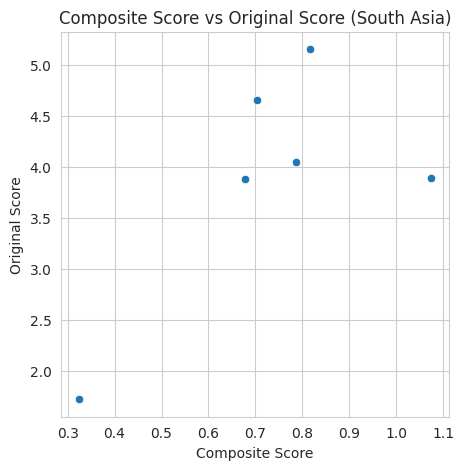

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_df["Composite Score"] = (
    0.40 * south_df["Log GDP per capita"] +
    0.30 * south_df["Social support"] +
    0.30 * south_df["Healthy life expectancy"]
)

ranked = south_df.sort_values("Composite Score", ascending=False)
print(ranked[["Country name", "Composite Score"]])

plt.figure(figsize=(5,5))
sns.barplot(y="Composite Score", x="Country name", data=ranked.head(5))
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x="Composite Score", y="score", data=south_df)
plt.title("Composite Score vs Original Score (South Asia)")
plt.xlabel("Composite Score")
plt.ylabel("Original Score")
plt.show()


Task - 3 - Outlier Detection:

    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


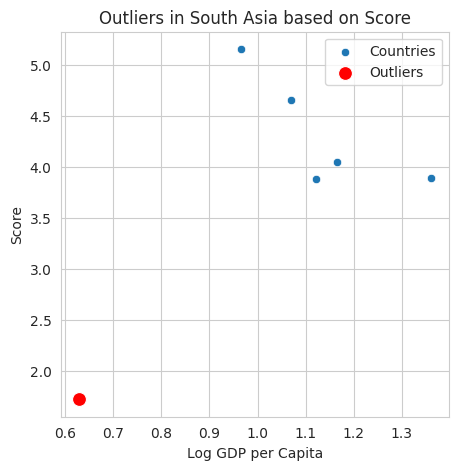


Discussion:
Outliers are those countries in South Asia whose Score is considerably higher or lower than all others.
These outliers can lead to regional averages that do not reflect a typical country's Score.
They may indicate unusual socio-economic conditions, inconsistency in data, or outstanding health performance.
social support or economic factors compared to other countries in the region.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_df.columns = south_df.columns.str.strip()


Q1 = south_df["score"].quantile(0.25)
Q3 = south_df["score"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = south_df[(south_df["score"] < lower) | (south_df["score"] > upper)]

print(outliers[["Country name", "score", "Log GDP per capita"]])

plt.figure(figsize=(5,5))
sns.scatterplot(x="Log GDP per capita", y="score", data=south_df, label="Countries")
sns.scatterplot(x="Log GDP per capita", y="score", data=outliers, color='red', s=100, label="Outliers")
plt.xlabel("Log GDP per Capita")
plt.ylabel("Score")
plt.title("Outliers in South Asia based on Score")
plt.legend()
plt.show()

print("\nDiscussion:")
print("Outliers are those countries in South Asia whose Score is considerably higher or lower than all others.")
print("These outliers can lead to regional averages that do not reflect a typical country's Score.")
print("They may indicate unusual socio-economic conditions, inconsistency in data, or outstanding health performance.")
print("social support or economic factors compared to other countries in the region.")

Task - 4 - Exploring Trends Across Metrics:

Correlation with Freedom: 0.8005185224163315
Correlation with Generosity: 0.874512371253192


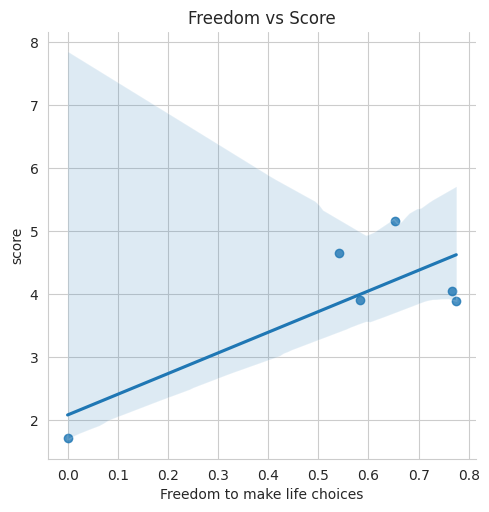

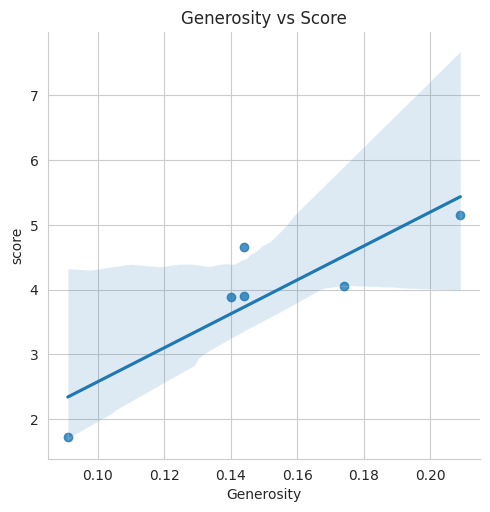


Generosity has the stronger correlation with Score.
Freedom to Make Life Choices has the weaker correlation with Score.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_df.columns = south_df.columns.str.strip()

metric1 = "Freedom to make life choices"
metric2 = "Generosity"

corr1 = south_df[metric1].corr(south_df["score"])
corr2 = south_df[metric2].corr(south_df["score"])

print("Correlation with Freedom:", corr1)
print("Correlation with Generosity:", corr2)

sns.lmplot(x=metric1, y="score", data=south_df)
plt.title("Freedom vs Score")
plt.show()

sns.lmplot(x=metric2, y="score", data=south_df)
plt.title("Generosity vs Score")
plt.show()

if abs(corr1) > abs(corr2):
    print("\nFreedom to Make Life Choices has the stronger correlation with Score.")
    print("Generosity has the weaker correlation with Score.")
else:
    print("\nGenerosity has the stronger correlation with Score.")
    print("Freedom to Make Life Choices has the weaker correlation with Score.")

Task - 5 - Gap Analysis:

Top 3 Negative Gaps:
     Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888

Top 3 Positive Gaps:
     Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764


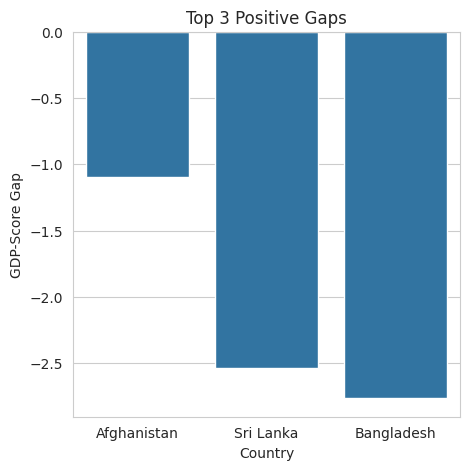

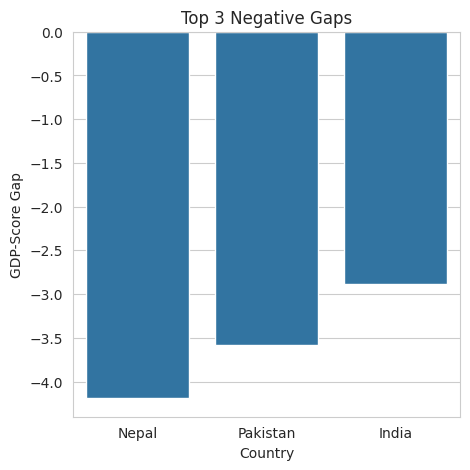


Discussion:
Countries with large positive gaps where GDP per Capita is much higher than Score may be economically advanced but that does not in itself guarantee other aspects of well-being.
Countries have a large negative gap, lower GDP per Capita in relation to their Score suggests that social support, health, or governance give people higher levels of well-being compared to output.
These gaps highlight a mismatch between economic indicators and human well-being within South Asia, and provide areas for policy focus.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

south_df["GDP-Score Gap"] = south_df["Log GDP per capita"] - south_df["score"]

asc = south_df.sort_values("GDP-Score Gap").head(3)
desc = south_df.sort_values("GDP-Score Gap", ascending=False).head(3)

print("Top 3 Negative Gaps:\n", asc[["Country name", "GDP-Score Gap"]])
print("\nTop 3 Positive Gaps:\n", desc[["Country name", "GDP-Score Gap"]])

plt.figure(figsize=(5,5))
sns.barplot(x="Country name", y="GDP-Score Gap", data=desc)
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")
plt.title("Top 3 Positive Gaps")
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x="Country name", y="GDP-Score Gap", data=asc)
plt.xlabel("Country")
plt.ylabel("GDP-Score Gap")
plt.title("Top 3 Negative Gaps")
plt.show()

print("\nDiscussion:")
print("Countries with large positive gaps where GDP per Capita is much higher than Score may be economically advanced but that does not in itself guarantee other aspects of well-being.")
print("Countries have a large negative gap, lower GDP per Capita in relation to their Score suggests that social support, health, or governance give people higher levels of well-being compared to output.")
print("These gaps highlight a mismatch between economic indicators and human well-being within South Asia, and provide areas for policy focus.")


3.3 Problem - 3 - Comparative Analysis:

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:

South Asia Mean: 3.895666666666667
Middle East Mean: 5.412100000000001
Middle East has higher average happiness.
South Asia Std: 1.1770690152521504
Middle East Std: 1.5662011684327144


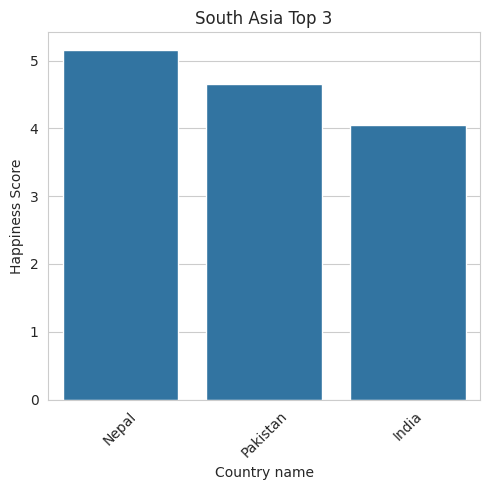

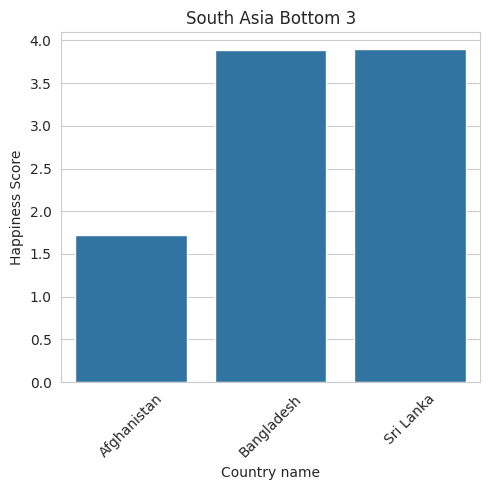

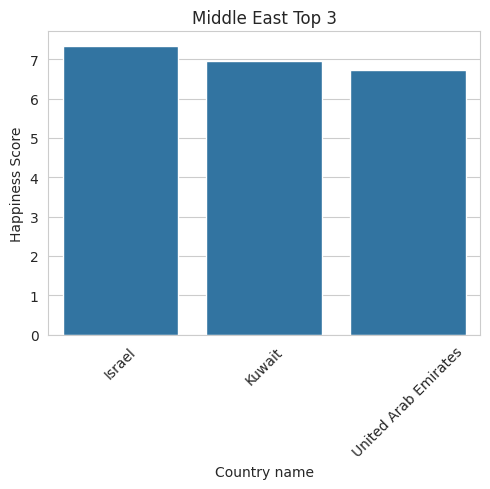

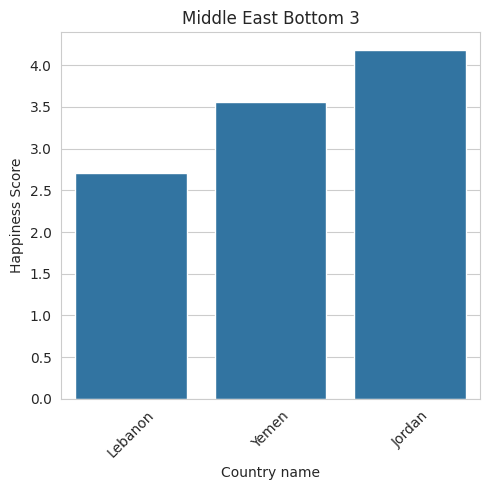

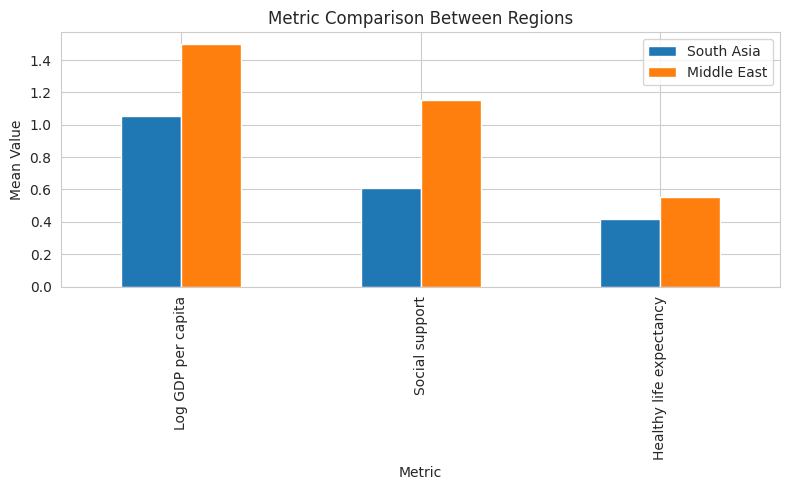

Metric disparities between regions:
 Log GDP per capita         0.444500
Social support             0.540944
Healthy life expectancy    0.133778
dtype: float64
Largest disparity metric: Social support
SA Range: 3.4370000000000003
ME Range: 4.634
Middle East has greater range in happiness scores.
SA CV: 0.3021482883337427
ME CV: 0.28938880812119405
South Asia has higher variability in happiness.
South Asia
Freedom Corr: 0.8005185224163315
Generosity Corr: 0.874512371253192


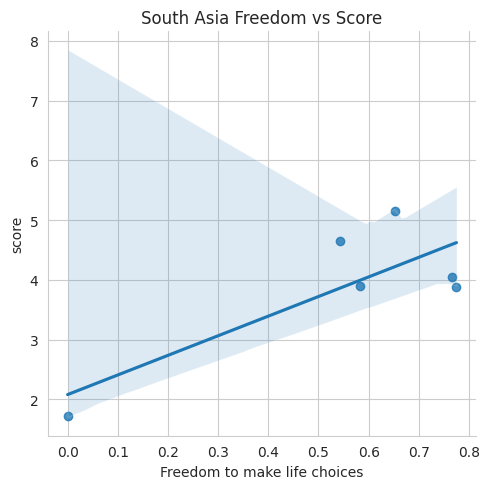

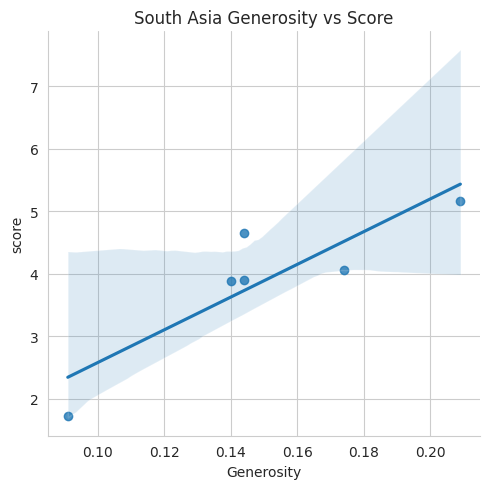

Middle East
Freedom Corr: 0.8632202433827543
Generosity Corr: 0.6275236536964182


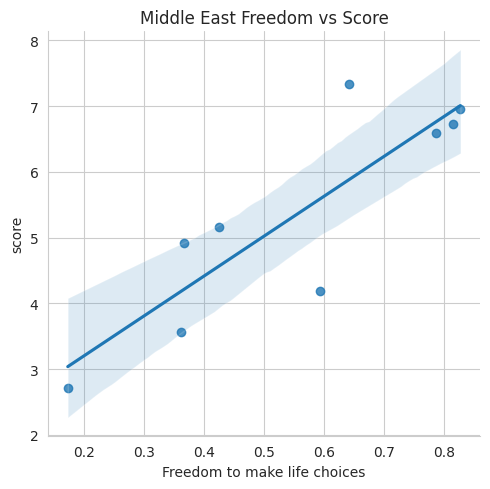

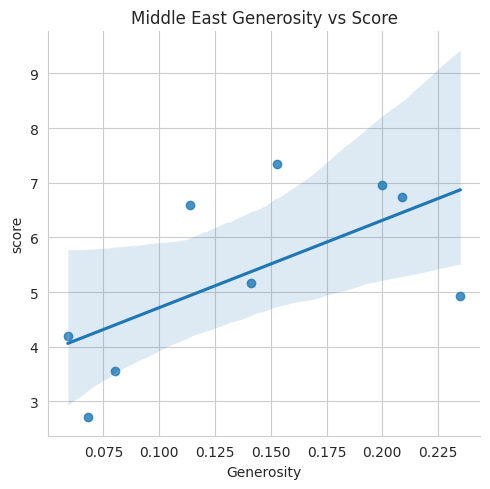

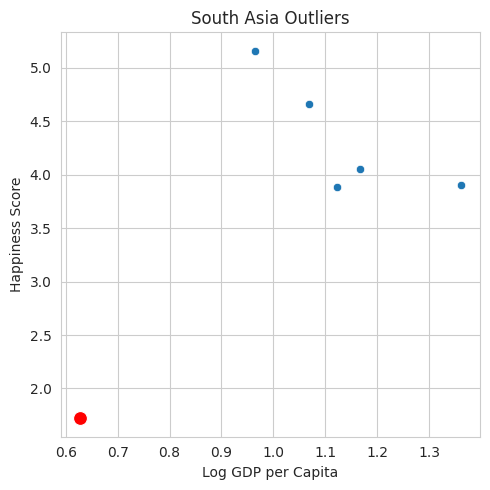

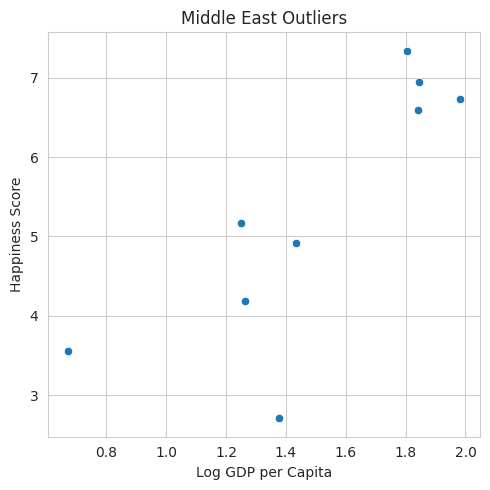

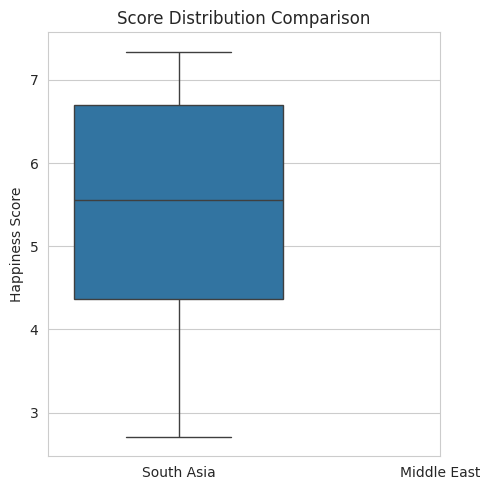

he boxplot shows that the Middle East has a larger spread of scores and some very high outliers. In contrast, South Asia’s scores are more tightly grouped around the median and have fewer outliers.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

middle_east = ["Bahrain","Iran","Iraq","Israel","Jordan","Kuwait","Lebanon","Oman",
               "Palestine","Qatar","Saudi Arabia","Syria","United Arab Emirates","Yemen"]

me_df = df[df["Country name"].isin(middle_east)].copy()

print("South Asia Mean:", south_df["score"].mean())
print("Middle East Mean:", me_df["score"].mean())
if south_df["score"].mean() > me_df["score"].mean():
    print("South Asia has higher average happiness.")
else:
    print("Middle East has higher average happiness.")
print("South Asia Std:", south_df["score"].std())
print("Middle East Std:", me_df["score"].std())

sa_top3 = south_df.sort_values("score", ascending=False).head(3)
sa_bottom3 = south_df.sort_values("score").head(3)
me_top3 = me_df.sort_values("score", ascending=False).head(3)
me_bottom3 = me_df.sort_values("score").head(3)

plt.figure(figsize=(5,5))
sns.barplot(x="Country name", y="score", data=sa_top3)
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.title("South Asia Top 3")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x="Country name", y="score", data=sa_bottom3)
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.title("South Asia Bottom 3")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x="Country name", y="score", data=me_top3)
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.title("Middle East Top 3")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.barplot(x="Country name", y="score", data=me_bottom3)
plt.xticks(rotation=45)
plt.ylabel("Happiness Score")
plt.title("Middle East Bottom 3")
plt.tight_layout()
plt.show()

metrics = ["Log GDP per capita", "Social support","Healthy life expectancy"]
sa_means = south_df[metrics].mean()
me_means = me_df[metrics].mean()
compare_df = pd.DataFrame({"Metric": metrics,"South Asia": sa_means,"Middle East": me_means})
compare_df.set_index("Metric").plot(kind="bar", figsize=(8,5))
plt.ylabel("Mean Value")
plt.title("Metric Comparison Between Regions")
plt.tight_layout()
plt.show()
disparity = abs(sa_means - me_means)
print("Metric disparities between regions:\n", disparity)
print("Largest disparity metric:", disparity.idxmax())

def cv(series):
    return series.std() / series.mean()

print("SA Range:", south_df["score"].max() - south_df["score"].min())
print("ME Range:", me_df["score"].max() - me_df["score"].min())
if (south_df["score"].max() - south_df["score"].min()) > (me_df["score"].max() - me_df["score"].min()):
    print("South Asia has greater range in happiness scores.")
else:
    print("Middle East has greater range in happiness scores.")
print("SA CV:", cv(south_df["score"]))
print("ME CV:", cv(me_df["score"]))
if cv(south_df["score"]) > cv(me_df["score"]):
    print("South Asia has higher variability in happiness.")
else:
    print("Middle East has higher variability in happiness.")

for region, data in [("South Asia", south_df), ("Middle East", me_df)]:
    print(region)
    print("Freedom Corr:", data["Freedom to make life choices"].corr(data["score"]))
    print("Generosity Corr:", data["Generosity"].corr(data["score"]))
    sns.lmplot(x="Freedom to make life choices", y="score", data=data)
    plt.title(f"{region} Freedom vs Score")
    plt.tight_layout()
    plt.show()
    sns.lmplot(x="Generosity", y="score", data=data)
    plt.title(f"{region} Generosity vs Score")
    plt.tight_layout()
    plt.show()

def find_outliers(df):
    Q1 = df["score"].quantile(0.25)
    Q3 = df["score"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return df[(df["score"] < lower) | (df["score"] > upper)]

sa_out = find_outliers(south_df)
me_out = find_outliers(me_df)

plt.figure(figsize=(5,5))
sns.scatterplot(x="Log GDP per capita", y="score", data=south_df)
sns.scatterplot(x="Log GDP per capita", y="score", data=sa_out, color='red', s=100)
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("South Asia Outliers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x="Log GDP per capita", y="score", data=me_df)
sns.scatterplot(x="Log GDP per capita", y="score", data=me_out, color='red', s=100)
plt.xlabel("Log GDP per Capita")
plt.ylabel("Happiness Score")
plt.title("Middle East Outliers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,5))
sns.boxplot(data=[south_df["score"], me_df["score"]])
plt.xticks([0,1], ["South Asia","Middle East"])
plt.ylabel("Happiness Score")
plt.title("Score Distribution Comparison")
plt.tight_layout()
plt.show()
print("The boxplot shows that the Middle East has a larger spread of scores and some very high outliers. In contrast, South Asia’s scores are more tightly grouped around the median and have fewer outliers.")